In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sqlalchemy import create_engine
import pyodbc

In [9]:
server_name = r"DESKTOP-31L69Q1\SQLEXPRESS"
database_name = "online_db"
connection_string = f"mssql+pyodbc://@{server_name}/{database_name}?driver=ODBC+Driver+17+for+SQL+Server"
connection1 = create_engine(connection_string)
query = "SELECT * from transactions"
df = pd.read_sql(query,connection1)
df.shape


(149116, 11)

In [11]:
query = "SELECT store_id, sum(transaction_qty*unit_price) as Total_revenue from transactions group by store_id"
pd.read_sql(query,connection1)

,store_id,Total_revenue
0,3,232243.91
1,8,236511.17
2,5,230057.25


In [13]:
query = "SELECT product_type, sum(transaction_qty*unit_price) as Total_revenue from transactions group by product_type order by Total_revenue desc"
pd.read_sql(query,connection1)

,product_type,Total_revenue
0,Barista Espresso,91406.20
1,Brewed Chai tea,77081.95
2,Hot chocolate,72416.00
3,Gourmet brewed coffee,70034.60
4,Brewed Black tea,47932.00
5,Brewed herbal tea,47539.50
6,Premium brewed coffee,38781.15
7,Organic brewed coffee,37746.50
8,Scone,36866.12
9,Drip coffee,31984.00


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  object 
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  object 
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  object 
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 12.5+ MB


In [17]:
df.describe()

,transaction_qty,unit_price
count,149116.000000,149116.000000
mean,1.438276,3.382219
std,0.542509,2.658723
min,1.000000,0.800000
25%,1.000000,2.500000
50%,1.000000,3.000000
75%,2.000000,3.750000
max,8.000000,45.000000


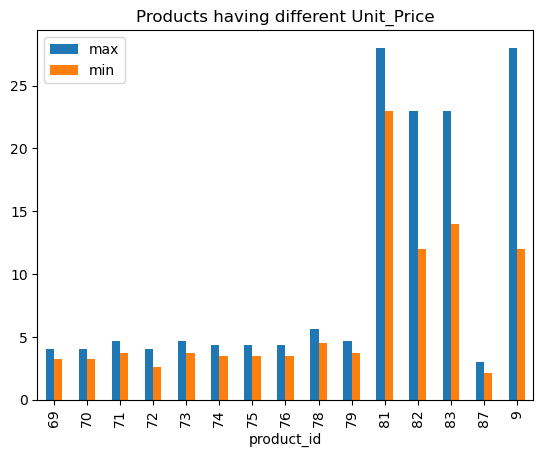

In [19]:
temp = df.groupby("product_id").agg({"unit_price": ["max", "min"]})
temp[temp.unit_price["max"] != temp.unit_price["min"]].plot(kind="bar")
plt.legend(["max","min"])
plt.title("Products having different Unit_Price")
plt.show()

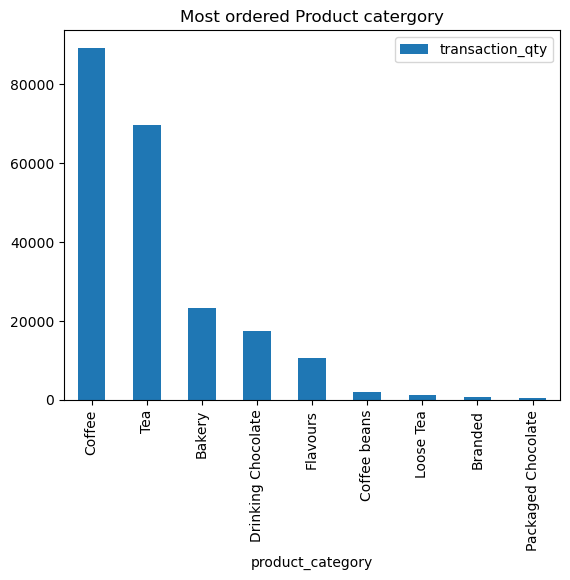

In [52]:
df.pivot_table(index='product_category', values='transaction_qty',aggfunc="sum").sort_values(by="transaction_qty",ascending=False).plot(kind="bar")
plt.title("Most ordered Product catergory")
plt.savefig("Product_quantity")
plt.show()